# PROJECT 1
## ANIKET PATIL
### Github- https://github.com/aniketpatil91/Telecom_Churn_Analysis/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')

In [2]:
churn = pd.read_csv('churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
# Checking values with blank spaces
churn[churn['TotalCharges']==' ']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# Removing Rows with blank spaces
churn = churn[churn['TotalCharges']!=' ']


In [8]:
churn['TotalCharges'] = churn['TotalCharges'].astype('float')
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [9]:
churn['SeniorCitizen'] = churn['SeniorCitizen'].astype('object')
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(1), o

Text(0,0.5,'TotalCharges')

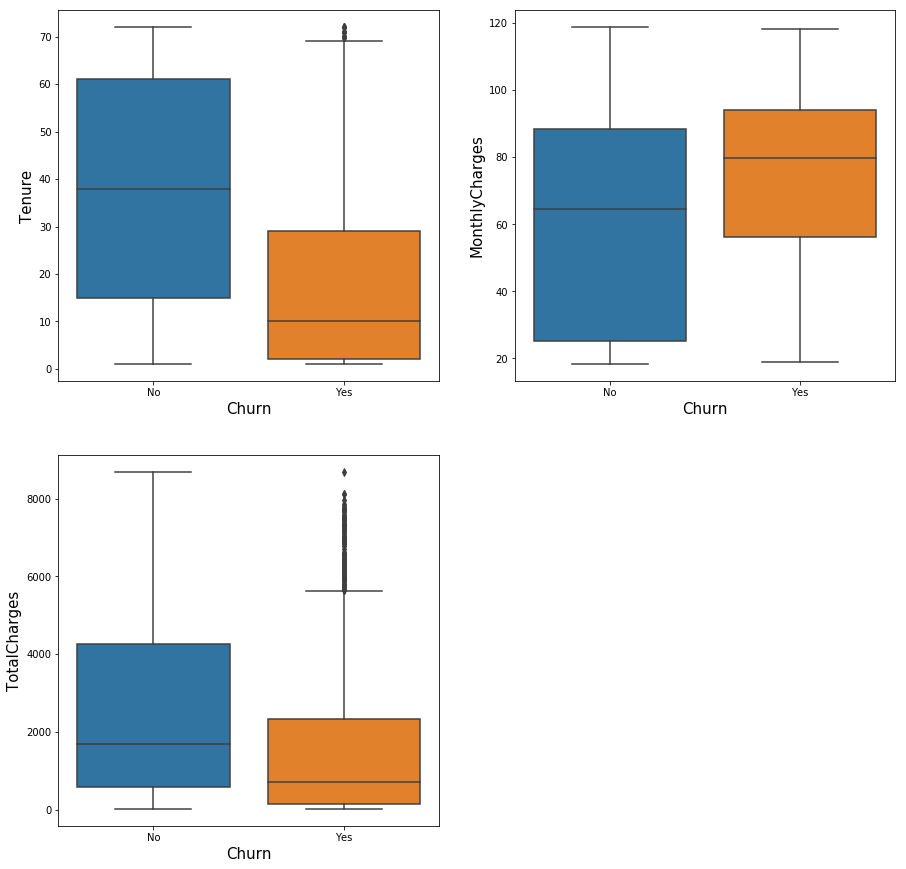

In [10]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))

sns.boxplot(churn['Churn'],churn['tenure'], ax=ax1)
ax1.set_xlabel('Churn',fontsize=15)
ax1.set_ylabel('Tenure',fontsize=15)

sns.boxplot(churn['Churn'],churn['MonthlyCharges'], ax=ax2)
ax2.set_xlabel('Churn',fontsize=15)
ax2.set_ylabel('MonthlyCharges',fontsize=15)

sns.boxplot(churn['Churn'],churn['TotalCharges'], ax=ax3)
ax3.set_xlabel('Churn',fontsize=15)
ax3.set_ylabel('TotalCharges',fontsize=15)



#### 1) We see that people with shorter tenure tends to churn
#### 2) If mothly charges are more people tends to churn

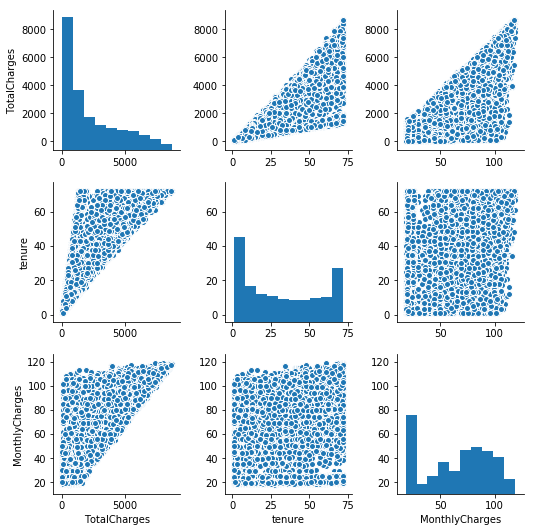

In [11]:
sns.pairplot(churn[['TotalCharges','tenure','MonthlyCharges']])

#### Totalcharges and monthly charges are correlated

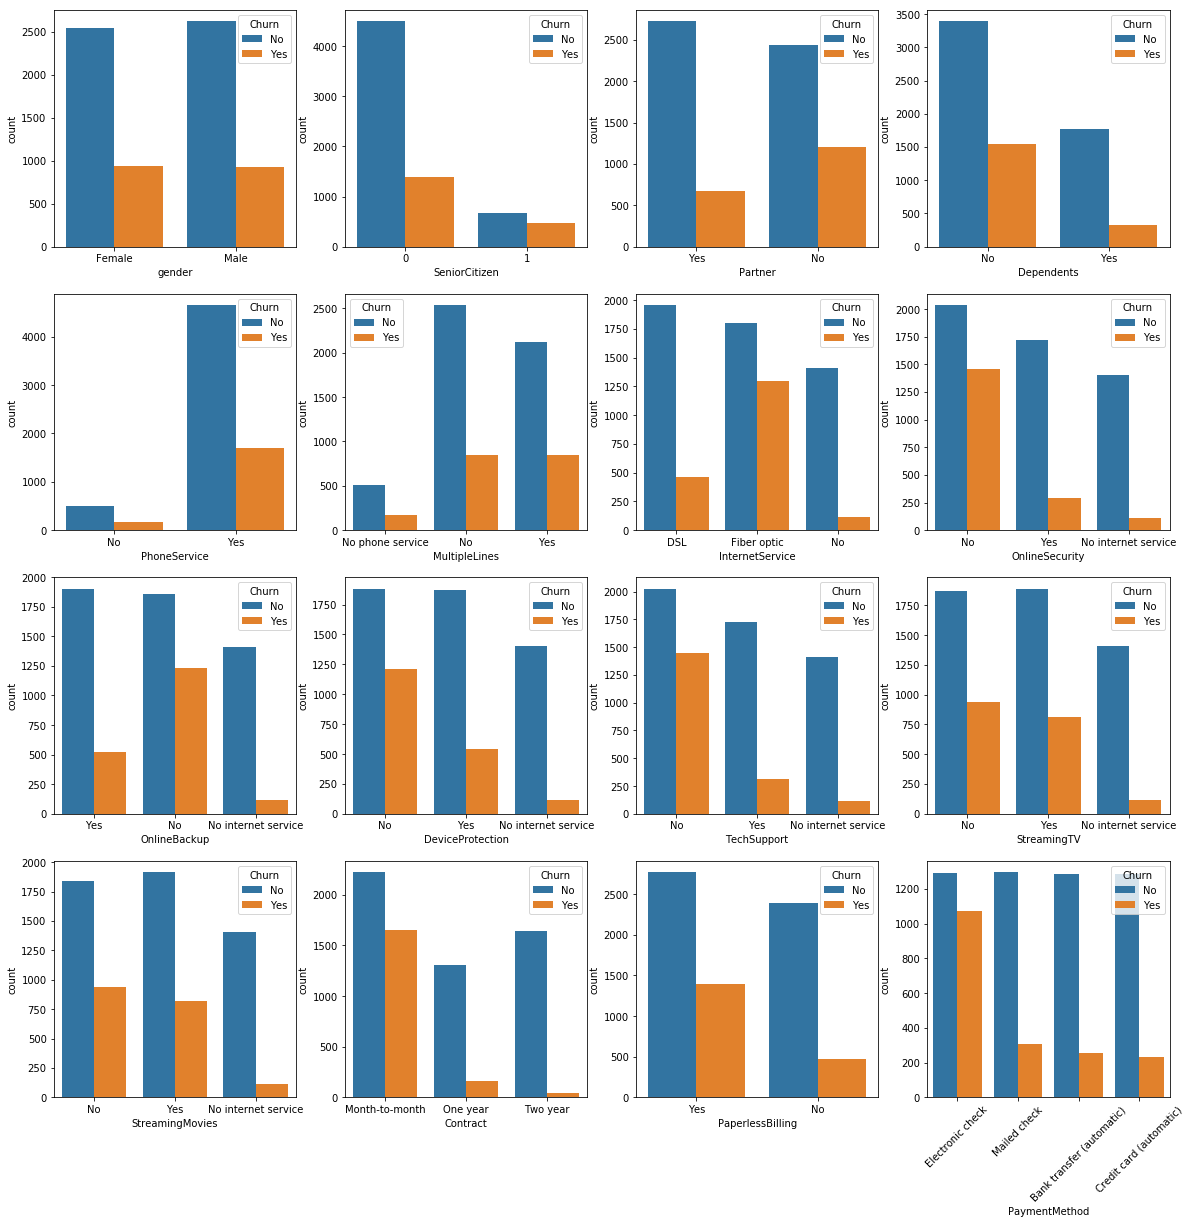

In [12]:
tmp = plt.subplots(4, 4, figsize=(20, 20))
tmp = tmp[1].flatten().tolist()
for i, col in enumerate(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                         'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                        ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']):
        g=sns.countplot(churn[col],hue=churn['Churn'],ax=tmp[i])
for tick in tmp[15].get_xticklabels():
    tick.set_rotation(45)

#### The plot displays relationship between churn and categorical variables, examoke month to month contract is good indicator of churn

In [13]:
# splitting categorical and continous variables
cont = churn[['MonthlyCharges','tenure']]

cat = churn[['Churn','gender', 'SeniorCitizen', 'Partner', 'Dependents',
                         'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                        ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]

In [14]:
# Creating dummy variables
dummy = pd.get_dummies(cat,drop_first=True) 

In [15]:
train=pd.concat([dummy,cont],axis=1) 

In [16]:
train.head()

,Churn_Yes,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,tenure
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,29.85,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,56.95,34
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,53.85,2
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,42.30,45
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,70.70,2


In [17]:
train.columns

Index(['Churn_Yes', 'gender_Male', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MonthlyCharges', 'tenure'],
      dtype='object')

In [18]:
# Dropping variables like "OnlineSecurity_No internet service" because we have already cosidered "Nointernet" variable
train = train.drop(['MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1)

In [19]:
X = train.drop(["Churn_Yes"], axis=1)

In [20]:
Y = train["Churn_Yes"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, 
                                                    random_state=22)

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
predictions = logmodel.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.90      0.87      1558
          1       0.65      0.51      0.57       552

avg / total       0.79      0.80      0.79      2110



In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1404,  154],
       [ 268,  284]], dtype=int64)